In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
print(tf.__version__)

1.15.0


In [4]:
cifar10 = tf.keras.datasets.cifar10
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

170500096/170498071 [==============================] - 10019s 59us/step


training data shape: (50000, 32, 32, 3)
training labels shape: (50000, 1)
test data shape: (10000, 32, 32, 3)
test labels shape: (10000, 1)
[2]


array([59, 62, 63], dtype=uint8)

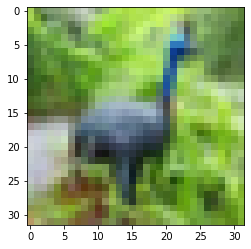

In [8]:
print('training data shape:',x_train.shape)
print('training labels shape:',y_train.shape)
print('test data shape:',x_test.shape)
print('test labels shape:',y_test.shape)
plt.imshow(x_train[6])
print(y_train[6])
label_dict = {0:'airplane', 1:'automobile', 2:'bird', 3:'cat', 4:'deer', 5:'dog', 6:'frog', 7:'horse', 8:'ship', 9:'truck'}
label_dict[y_train[6][0]]

x_train[0][0][0]

In [9]:
#对图像进行数字标准化
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

In [10]:
#建立sequential线性堆叠模型
model = tf.keras.models.Sequential()
#第一个卷积层
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size =(3,3),
                                input_shape = (32,32,3),
                                activation='relu',
                                padding='same'))

#防止过拟合
model.add(tf.keras.layers.Dropout(rate=0.3))

#第一个池化层

model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),
         activation='relu',
         padding='same'))

#防止过拟合
model.add(tf.keras.layers.Dropout(rate=0.3))

#第二个池化层
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
#平坦层
model.add(tf.keras.layers.Flatten())

#添加输出层
model.add(tf.keras.layers.Dense(10,activation='softmax'))







In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0

In [12]:
#设置训练参数
train_epochs = 5 #训练数
batch_size = 100 #单次训练样本数（批次大小）

In [13]:
#定义训练模式
model.compile(optimizer='adam', #优化器
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy']) # 评估模型的方式

In [14]:
train_history = model.fit(x_train,y_train,
                          validation_split=0.2,
                          epochs = train_epochs,
                          batch_size = batch_size,
                          verbose = 2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/5
40000/40000 - 89s - loss: 1.6183 - accuracy: 0.4235 - val_loss: 1.4626 - val_accuracy: 0.5306
Epoch 2/5
40000/40000 - 91s - loss: 1.2462 - accuracy: 0.5603 - val_loss: 1.2895 - val_accuracy: 0.6010
Epoch 3/5
40000/40000 - 88s - loss: 1.1096 - accuracy: 0.6122 - val_loss: 1.2029 - val_accuracy: 0.6293
Epoch 4/5
40000/40000 - 89s - loss: 1.0269 - accuracy: 0.6408 - val_loss: 1.1469 - val_accuracy: 0.6401
Epoch 5/5
40000/40000 - 104s - loss: 0.9561 - accuracy: 0.6686 - val_loss: 1.0639 - val_accuracy: 0.6740


In [15]:
def visu_train_history(train_history,train_metric,validation_metric):
    plt.plot(train_history.history[train_metric])
    plt.plot(train_history.history[validation_metric])
    plt.title('train history')
    plt.ylabel(train_metric)
    plt.xlabel('epoch')
    plt.legend(['train','validation'],loc='upper,left')
    plt.show()

E:\soft\anaconda1\envs\tensor2\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Unrecognized location 'upper,left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  import sys


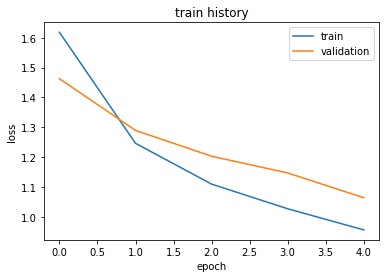

In [16]:
visu_train_history(train_history,'loss','val_loss')

E:\soft\anaconda1\envs\tensor2\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Unrecognized location 'upper,left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  import sys


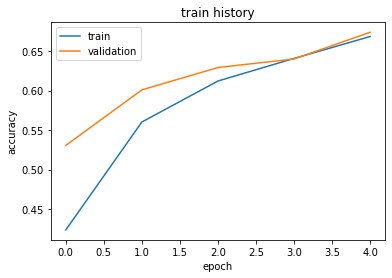

In [17]:
visu_train_history(train_history,'accuracy','val_accuracy')

In [18]:
test_loss,test_acc = model.evaluate(x_test,y_test,verbose=2)
print('test accuracy:',test_acc)

10000/1 - 5s - loss: 1.0882 - accuracy: 0.6686
test accuracy: 0.6686


In [19]:
preds = model.predict_classes(x_test)

In [20]:
preds

array([3, 8, 8, ..., 5, 1, 7], dtype=int64)

In [23]:
#定义显示图像数据及其对应标签的函数
def plot_images_labels_prediction(images,labels,preds,index,num = 5):
    fig = plt.gcf()
    fig.set_size_inches(12,6)
    if num >10:
        num = 10
    for i in range(0,num):
        ax = plt.subplot(2,5,i+1)#获取当前要处理的 子图
        ax.imshow(images[index])
        title = str(i)+','+label_dict[labels[index][0]]
        if len(preds)>0:
            title += '=>' + label_dict[preds[index]]
        ax.set_title(title,fontsize = 10)
        index +=1
    plt.show()
    

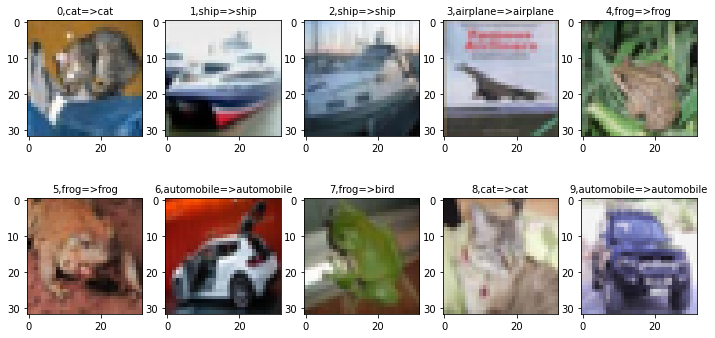

In [24]:
plot_images_labels_prediction(x_test,y_test,preds,0,10)

In [26]:
#保存模型
model_filename = 'models/cifarcnnmldel.h5'
model.save_weights(model_filename)
print('已保存模型权重')

已保存模型权重


In [27]:
#加载模型
model_filename = 'models/cifarcnnmldel.h5'

try:
    model.load_weights(model_filename)
    print('加载模型权重成功')
except:
    print('加载模型权重失败')

加载模型权重成功


In [28]:
#设置回调函数
#可以是格式化的字符串 里面的占位符将会被epoch值和传入监控指标所填入
checkpoint_filepath = './checkpoint/Cifar10.{epoch:02d}-{val_loss:.4f}.H5'

callbacks = [
    #保存模型的回调函数
    tf.keras.callbacks.ModelCheckpoint(filepath = checkpoint_filepath,
                                      save_weights_only =True,
                                      verbose = 0,
                                      save_freq = 'epoch'),
    tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=3)
]

In [32]:
train_history = model.fit(x_train,y_train,
                         validation_split = 0.2,
                         epochs = train_epochs,
                         batch_size=batch_size,
                         callbacks = callbacks,
                         verbose = 2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/5
40000/40000 - 92s - loss: 0.8407 - accuracy: 0.7100 - val_loss: 0.9924 - val_accuracy: 0.6787
Epoch 2/5
40000/40000 - 97s - loss: 0.8179 - accuracy: 0.7151 - val_loss: 0.9542 - val_accuracy: 0.6959
Epoch 3/5
40000/40000 - 93s - loss: 0.7952 - accuracy: 0.7237 - val_loss: 0.9460 - val_accuracy: 0.7006
Epoch 4/5
40000/40000 - 90s - loss: 0.7744 - accuracy: 0.7335 - val_loss: 0.9727 - val_accuracy: 0.6925
Epoch 5/5
40000/40000 - 89s - loss: 0.7582 - accuracy: 0.7358 - val_loss: 0.9399 - val_accuracy: 0.6955


In [31]:
#加载模型
checkpoint_dir = './checkpoint/' #检查点文件保存目录

#得到最新的检查点文件
model_filename = tf.train.latest_checkpoint(checkpoint_dir)

if model_filename != None :
    model.load_weights(model_filename)
    print('加载模型权重文件{}成功！'.format(model_filename))
    
else:
    print("没找到模型权重文件，需要重头开始训练")

加载模型权重文件./checkpoint/Cifar10.02-1.0319.H5成功！
